## Loading the Dataset

In [4]:
import os
import urllib
import tarfile

# URL of the dataset in the internet
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Local location for the dataset
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
    # Constructing the Directories
    if not os.path.exists(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    # Retrieving the File
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # Opening the file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
import numpy as np
import pandas as pd

def load_housing(housing_path=HOUSING_PATH):
    return pd.read_csv(housing_path + "/housing.csv")

In [6]:
# Downloading the Data
fetch_housing_data()

# Accessing the Dataset
housing_df = load_housing()
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Viewing the Charecteristics of the Dataset

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Sampling the Dataset

**Random Sampling**

In [9]:
def random_sampling(data, test_ratio):
    
    # Shuffling the Indices
    shuffle_idx = np.random.permutation(len(data))
    
    # Rounding the Size
    test_size = int(test_ratio * len(data))
    
    # Splitting the Indices
    train_idx = shuffle_idx[test_size:]
    test_idx = shuffle_idx[:test_size]
    
    # Splitting the Dataset
    return data.iloc[train_idx], data.iloc[test_idx]

random_train, random_test = random_sampling(housing_df, 0.15)
random_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15911,-122.42,37.75,52.0,2163.0,607.0,1447.0,546.0,3.3555,275000.0,NEAR BAY
13768,-117.07,34.05,14.0,5764.0,1006.0,1876.0,841.0,1.9694,173200.0,INLAND
19385,-120.85,37.77,20.0,651.0,157.0,421.0,151.0,2.0833,77300.0,INLAND
2948,-118.99,35.32,26.0,875.0,199.0,567.0,204.0,0.9288,36600.0,INLAND
12525,-121.48,38.56,46.0,1476.0,344.0,688.0,353.0,2.7316,134700.0,INLAND


**Stratified Sampling**

*When working with Stratified Sampling we have to use a `Categorical Column` to Account for the Strata*

In [10]:
housing_df["income_cat"] = pd.cut(housing_df["median_income"], 
                    bins=[0, 1.5, 3, 4.5, 6, np.inf], 
                    labels=[1, 2, 3, 4, 5])

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialising the Split with Parameters
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=1730)

# Using Stratified Split for one iteration
for train_idx, test_idx in strat_split.split(housing_df, housing_df["income_cat"]):
    strat_train_1 = housing_df.iloc[train_idx]
    strat_test_1 = housing_df.iloc[test_idx]

strat_train_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
9952,-122.32,38.35,20.0,3494.0,549.0,1673.0,541.0,5.5718,185200.0,INLAND,4
16601,-120.69,35.64,38.0,2564.0,546.0,1301.0,481.0,2.0076,114000.0,<1H OCEAN,2
1863,-123.91,41.68,22.0,1880.0,360.0,743.0,314.0,2.9688,152700.0,<1H OCEAN,2
15136,-116.92,32.84,16.0,4675.0,834.0,2188.0,817.0,4.6674,178000.0,<1H OCEAN,4
8481,-118.29,33.93,31.0,3894.0,1017.0,3590.0,962.0,2.0437,137200.0,<1H OCEAN,2


**SKLearn TrainTestSplit**

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size=0.8, random_state=1730, stratify=housing_df["income_cat"])
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
9952,-122.32,38.35,20.0,3494.0,549.0,1673.0,541.0,5.5718,185200.0,INLAND,4
16601,-120.69,35.64,38.0,2564.0,546.0,1301.0,481.0,2.0076,114000.0,<1H OCEAN,2
1863,-123.91,41.68,22.0,1880.0,360.0,743.0,314.0,2.9688,152700.0,<1H OCEAN,2
15136,-116.92,32.84,16.0,4675.0,834.0,2188.0,817.0,4.6674,178000.0,<1H OCEAN,4
8481,-118.29,33.93,31.0,3894.0,1017.0,3590.0,962.0,2.0437,137200.0,<1H OCEAN,2


## Analysis of the Dataset

In [13]:
corr_mat = housing_df.drop("ocean_proximity", axis=1).corr()
corr_mat["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [14]:
housing_df = housing_df.drop("income_cat", axis=1)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Visualising the Data

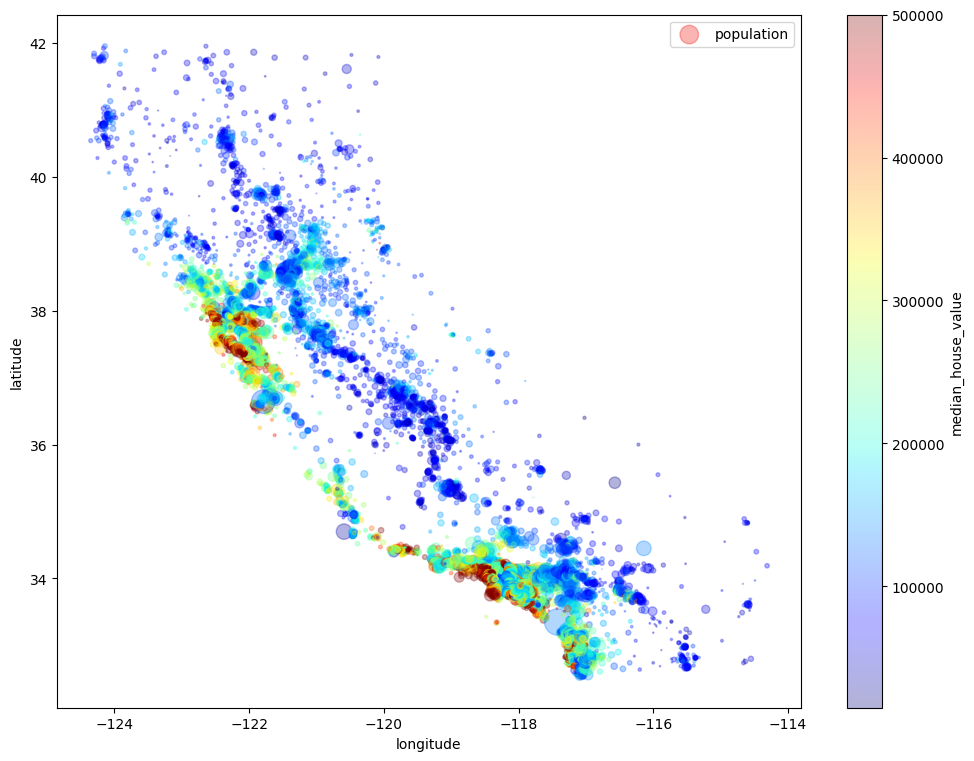

In [15]:
import matplotlib.pyplot as plt

housing_df.plot(kind="scatter", 
                x="longitude", 
                y="latitude", 
                alpha=0.3, 
                s=housing_df["population"]/100, 
                label="population",
                figsize=(12, 9),
                c="median_house_value", 
                cmap=plt.get_cmap("jet"))

plt.legend()

<Axes: >

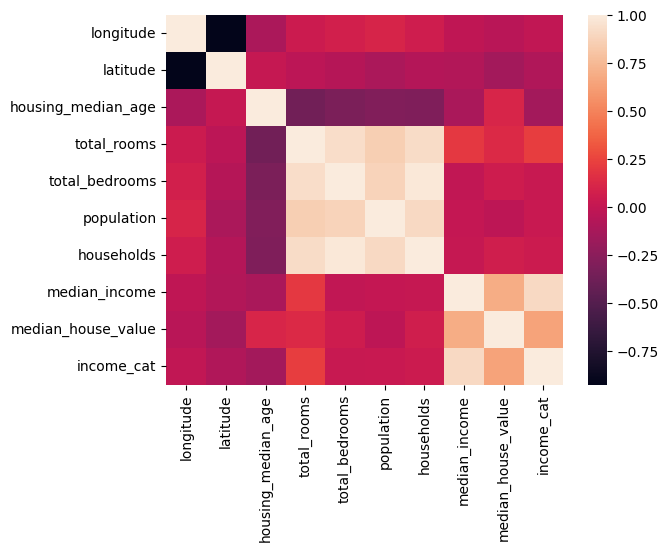

In [16]:
import seaborn as sns

sns.heatmap(corr_mat)

In [17]:
housing_df["rooms_per_household"] = housing_df["total_rooms"] / housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"] / housing_df["total_rooms"]
housing_df["population_per_household"] = housing_df["population"] / housing_df["households"]

corr_mat = housing_df.drop("ocean_proximity", axis=1).corr()
corr_mat["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Preparing the Data for ML Algorithms (Data Cleaning)

In [18]:
housing = strat_train_1.drop("median_house_value", axis=1)
housing_labels = strat_train_1["median_house_value"].copy()

In [19]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


## Removing Null Values

1. Remove Attr
2. Remove Rows
3. Fill Rows using some value
4. Fill Rows using an Estimator

In [20]:
# Dropping the Rows with Null Values
housing_df.dropna(subset=["total_bedrooms"]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   median_house_value        20433 non-null  float64
 9   ocean_proximity           20433 non-null  object 
 10  rooms_per_household       20433 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


In [21]:
# Filling Rows using Median
median = housing_df["total_bedrooms"].median()
housing_df.fillna(median).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [22]:
# Filling the Rows using an Estimator
from sklearn.impute import SimpleImputer

# Initilaising the Imputer
imputer = SimpleImputer(strategy="median")

# Retaining the Numerical Columns
housing_num = housing_df.drop("ocean_proximity", axis=1)

# Training the Imputer for Estimation
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [23]:
print(f"The parameters learnt by the imputer: {imputer.statistics_}")
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

The parameters learnt by the imputer: [-1.18490000e+02  3.42600000e+01  2.90000000e+01  2.12700000e+03
  4.35000000e+02  1.16600000e+03  4.09000000e+02  3.53480000e+00
  1.79700000e+05  5.22912879e+00  2.03162434e-01  2.81811565e+00]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float

## Working with Categorical Attributes

In [24]:
housing_cat = housing_df[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [25]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ord_enc = OrdinalEncoder()
one_hot_enc = OneHotEncoder()

cat_ord = ord_enc.fit_transform(housing_cat)
cat_one_hot = one_hot_enc.fit_transform(housing_cat)

print(cat_ord.shape)
print(cat_one_hot.shape)

(20640, 1)
(20640, 5)


In [26]:
print("Ordinal Encoder Result\n", cat_ord[:5])
print("\nOne Hot Encoder Result\n", cat_one_hot[:5, :])

Ordinal Encoder Result
 [[3.]
 [3.]
 [3.]
 [3.]
 [3.]]

One Hot Encoder Result
   (0, 3)	1.0
  (1, 3)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 3)	1.0


In [27]:
print(ord_enc.categories_)
print(one_hot_enc.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [28]:
cat_one_hot_arr = cat_one_hot.toarray()
print("\nOne Hot Encoder Result\n", cat_one_hot_arr[:5, :])


One Hot Encoder Result
 [[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


## Custom Transformers

In [29]:
from sklearn.base import TransformerMixin, BaseEstimator

# Indexes of Cols which are used for transformation
rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6

class CustomAttrAddr(TransformerMixin, BaseEstimator):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        # Creating the Custom Attributes
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        pop_per_household = X[:, population_idx] / X[:, households_idx]
        
        # Adding them to the Data Array
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, bedrooms_per_room, rooms_per_household, pop_per_household]
        
        else:
            return np.c_[X, rooms_per_household, pop_per_household]

In [30]:
# Initialising the Custom Transformer
attr_addr = CustomAttrAddr(add_bedrooms_per_room=True)
housing_extra = attr_addr.fit_transform(housing_df.values)
housing_extra.shape

(20640, 16)

In [31]:
housing_df.values.shape

(20640, 13)

## Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_max_sc = MinMaxScaler()
std_sc = StandardScaler()

# Using Standard Scaler
housing_num_std = std_sc.fit_transform(housing_num)
housing_num_std = pd.DataFrame(housing_num_std, columns=housing_num.columns)
housing_num_std.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.146024,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,0.327041,-0.987254,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.440514,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.492925,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.706141,-0.085616


In [33]:
# Using Min Max Scaler
housing_num_mm = min_max_sc.fit_transform(housing_num)
housing_num_mm = pd.DataFrame(housing_num_mm, columns=housing_num.columns)
housing_num_mm.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.043512,0.051768,0.001499
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.038224,0.061996,0.001141
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.052756,0.032796,0.001698
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.035241,0.093843,0.001493
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.038534,0.080107,0.001198


## Building Pipelines

In [34]:
from sklearn.pipeline import Pipeline

transform_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("att_addr", CustomAttrAddr()),
    ("std_sc", StandardScaler())
])

housing_num_new = housing_df.drop("ocean_proximity", axis=1)
housing_num_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [35]:
housing_num_new.shape

(20640, 12)

In [36]:
# Applying the Pipeline
housing_num_tr = transform_pipe.fit_transform(housing_num_new)
housing_num_tr[:5, :]

array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97247648,
        -0.9744286 , -0.97703285,  2.34476576,  2.12963148,  0.62855945,
        -1.14993031, -0.04959654, -1.02998783,  0.62855945, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.35714343,
         0.86143887,  1.66996103,  2.33223796,  1.31415614,  0.32704136,
        -0.99038135, -0.09251223, -0.8888972 ,  0.32704136, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82702426,
        -0.82077735, -0.84363692,  1.7826994 ,  1.25869341,  1.15562047,
        -1.44586501, -0.02584253, -1.29168566,  1.15562047, -0.02584253],
       [-1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71972345,
        -0.76602806, -0.73378144,  0.93296751,  1.16510007,  0.15696608,
        -0.49362714, -0.0503293 , -0.4496128 ,  0.15696608, -0.0503293 ],
       [-1.33781784,  1.03850269,  1.85618152, -0.46240395, -0.61242263,
        -0.75984669, -0.62915718, -0.012881  , 

## PipeLine for the Entire Dataset

In [46]:
from sklearn.compose import ColumnTransformer

num_attr = list(housing_num)
num_attr.remove("median_house_value")
cat_attr = ["ocean_proximity"]

full_pipe = ColumnTransformer([
    ("num_pipe", transform_pipe, num_attr),
    ("cat_pipe", one_hot_enc, cat_attr)
])

housing_tr = full_pipe.fit_transform(housing_df)
print(housing_tr[:5, :])

[[-1.32783522  1.05254828  0.98214266 -0.8048191  -0.97247648 -0.9744286
  -0.97703285  2.34476576  0.62855945 -1.14993031 -0.04959654 -1.02998783
   0.62855945 -0.04959654  0.          0.          0.          1.
   0.        ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901   1.35714343  0.86143887
   1.66996103  2.33223796  0.32704136 -0.99038135 -0.09251223 -0.8888972
   0.32704136 -0.09251223  0.          0.          0.          1.
   0.        ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589 -0.82702426 -0.82077735
  -0.84363692  1.7826994   1.15562047 -1.44586501 -0.02584253 -1.29168566
   1.15562047 -0.02584253  0.          0.          0.          1.
   0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.62421459 -0.71972345 -0.76602806
  -0.73378144  0.93296751  0.15696608 -0.49362714 -0.0503293  -0.4496128
   0.15696608 -0.0503293   0.          0.          0.          1.
   0.        ]
 [-1.33781784  1.03850269  1.85618152 -0.46240395 -0.61242263 -0.75984669
  -0.62915718

## Assessing Models

In [59]:
# Seperating the Labels
housing_labels = housing_df["median_house_value"]

# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(housing_tr, housing_labels, test_size=0.15)
print(f"X Train: {X_train.shape}")
print(f"y Train: {y_train.shape}")
print(f"X Test: {X_test.shape}")
print(f"y Test: {y_test.shape}")

X Train: (17544, 19)
y Train: (17544,)
X Test: (3096, 19)
y Test: (3096,)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

In [61]:
# Using Linear Regression
lin_reg.fit(X_train, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_squared_error

predictions_lin = lin_reg.predict(X_test)
error_mean = mean_squared_error(y_test, predictions_lin)
print("Error RMSE: ", np.sqrt(error_mean))

Error RMSE:  70109.13538768723


In [63]:
scores = cross_val_score(tree, housing_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    
display_scores(tree_rmse)

Scores:  [118833.77035468  70245.71513335  82870.06412492  75400.08840981
  88864.8574931   79975.92961203  69863.91673561 102108.95962991
  93331.65248195  75234.25949895]
Mean:  85672.92134743104
Standard Deviation:  14769.433570168507


In [64]:
scores = cross_val_score(forest, housing_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-scores)

display_scores(forest_rmse)

Scores:  [96564.27211697 47275.35813263 65436.70003263 56842.26839813
 61089.74913935 59681.04688569 47253.03950772 80425.73449317
 74483.40334651 49116.28016915]
Mean:  63816.785222195635
Standard Deviation:  15172.086980354572
